# COMP9414 Assignment1
### Name: Renfei Yu (Klaus)
### zID: z5546743

# Classification
## Reading File

Firstly, Install all the packages and read data from xlsx file

1) Pandas for data processing and structure
2) Numpy for Array operation
3) matplotlib for drawing plots
4) seaborn for drawing plots
3) Sklearn for data processing and normalisation
4) Keras for MLP modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, mean_absolute_error

# Load the Excel file
file_path = "AirQualityUCI _ Students.xlsx"
data = pd.read_excel(file_path)

# collect all missing values for replacement or deletion
missing_values = data == -200
missing_column = missing_values.any()

print(missing_values.sum())

data.describe()

Date                0
Time                0
CO(GT)           1585
PT08.S1(CO)       366
NMHC(GT)         7525
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1573
PT08.S3(NOx)      366
NO2(GT)          1576
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8358,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000
mean,2004-09-20 04:16:42.727925376,-36.187928,1038.533411,-158.119167,0.894268,889.323901,162.607933,790.043631,53.912228,1382.696877,968.419987,8.713360,38.201273,-7.780588
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-17 00:00:00,0.500000,915.062500,-200.000000,3.968875,709.000000,45.000000,634.250000,49.000000,1177.500000,692.062500,10.450000,33.974999,0.675253
50%,2004-09-21 00:00:00,1.500000,1048.500000,-200.000000,7.826424,892.000000,136.000000,793.000000,95.000000,1442.500000,940.125000,17.225000,48.137500,0.971383
75%,2004-12-27 00:00:00,2.600000,1215.687500,-200.000000,13.636091,1104.750000,282.000000,958.687500,132.000000,1658.187500,1251.750000,24.075000,61.593750,1.307486
max,2005-04-01 00:00:00,11.900000,2007.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,87.174999,2.231036
std,NaN,79.260156,338.349674,141.931963,43.609487,350.473599,260.322621,327.590979,130.150259,479.299713,464.837162,45.516939,53.678637,41.139234


## Feature value vs Timeline (Original Data)

C:\Users\klaus\AppData\Local\Temp\ipykernel_10792\3063529275.py:22: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


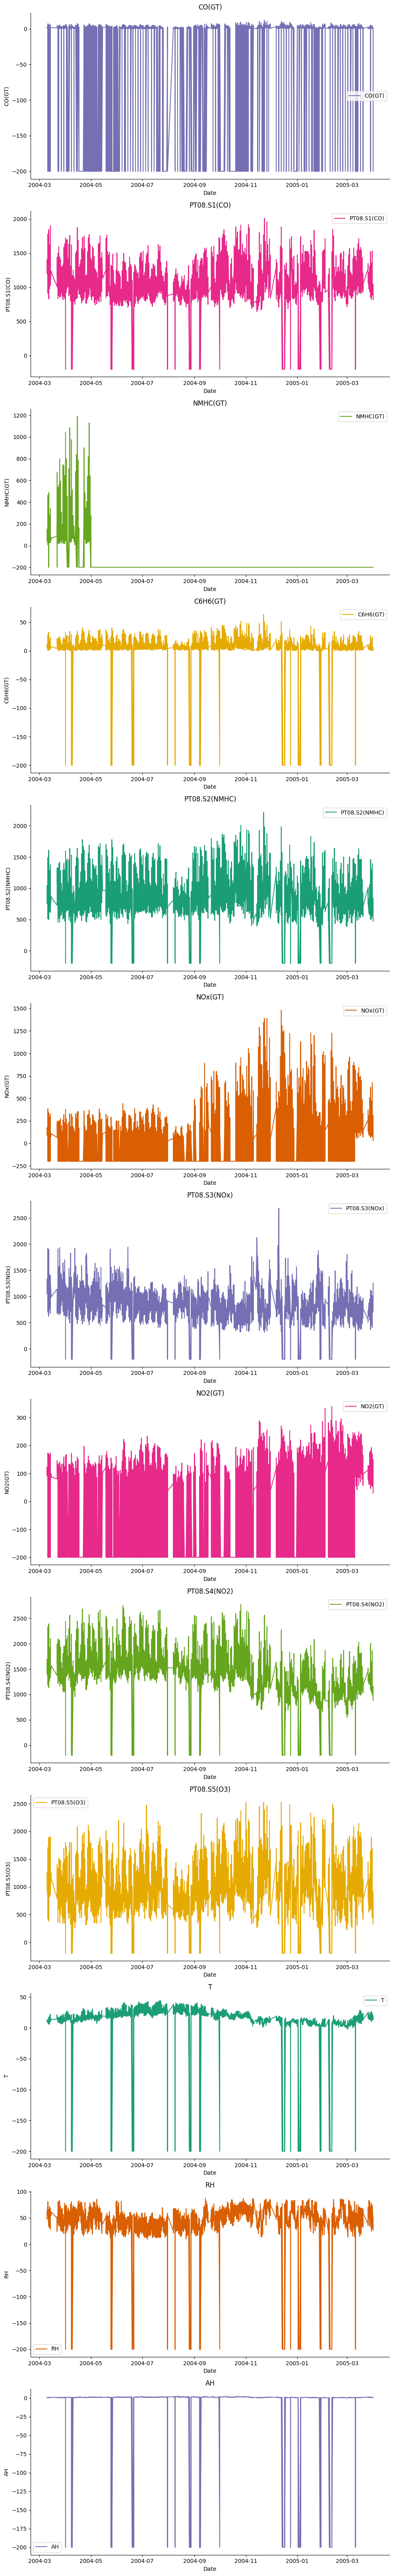

In [2]:
def plot_time_series(data, date_col, ignore_cols):
    # make sure the data are sorted by date
    data_sorted = data.sort_values(date_col, ascending=True)
    
    # create the canvas
    fig, axes = plt.subplots(nrows=len(data.columns) - len(ignore_cols), figsize=(10, 5 * (len(data.columns) - len(ignore_cols))), layout='constrained')
    
    # set the solour set
    palette = list(sns.palettes.mpl_palette('Dark2'))

    # traverse all the columns, create a plot for each feature
    for i, col in enumerate(data.columns):
        if col not in ignore_cols:
            ax = axes[i - len(ignore_cols)]
            ax.plot(data_sorted[date_col], data_sorted[col], label=col, color=palette[i % len(palette)])
            ax.set_title(col)
            ax.set_xlabel('Date')
            ax.set_ylabel(col)
            ax.legend()

    sns.despine(fig=fig)
    plt.tight_layout()
    plt.show()

plot_time_series(data, 'Date', ['Date', 'Time'])


## Data Preprocessing Part1 
### Handle Missing Value

replace the missing values: replace all -200 to Nan

fill the Nan value by using linera interpolate on each Nan data - I thought about using mean or interpolation, then I find it is more suitable for time series to use interpolation.

I didn't use polynomial interpolation to avoid overfitting, so I use liner instead.





In [3]:
# Replace -200 values with NaN for further processing

linear_interpolate_data = data.replace(-200, np.nan)

columns_missing = linear_interpolate_data.columns[2:]

linear_interpolate_data[columns_missing] = linear_interpolate_data[columns_missing].interpolate(method='linear')

# # at this stage, I have 2 versions of data
# # 1. data - the original data from xlsx file, which include -200 values
# # 2. linear_interpolate_data - the data that replaces -200 values to nan, then replace nan to interpolate data,


linear_interpolate_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,2005-04-01,10:00:00,1.0,947.75,275.0,3.525377,683.75,180.0,851.00,119.9,1010.50,599.00,16.450,40.775000,0.757020
8354,2005-04-01,11:00:00,1.0,938.50,275.0,3.576895,686.75,197.1,869.75,122.9,980.50,549.50,18.925,33.775001,0.731210
8355,2005-04-01,12:00:00,1.1,924.50,275.0,4.045717,713.25,172.0,853.00,114.9,956.75,518.00,19.175,29.475000,0.648005
8356,2005-04-01,13:00:00,1.3,923.75,275.0,4.519882,738.75,183.6,833.75,122.2,966.00,540.50,19.925,26.300000,0.605405


## Feature value vs Timeline (Data After Linear Interpolate)

C:\Users\klaus\AppData\Local\Temp\ipykernel_10792\3235649730.py:22: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


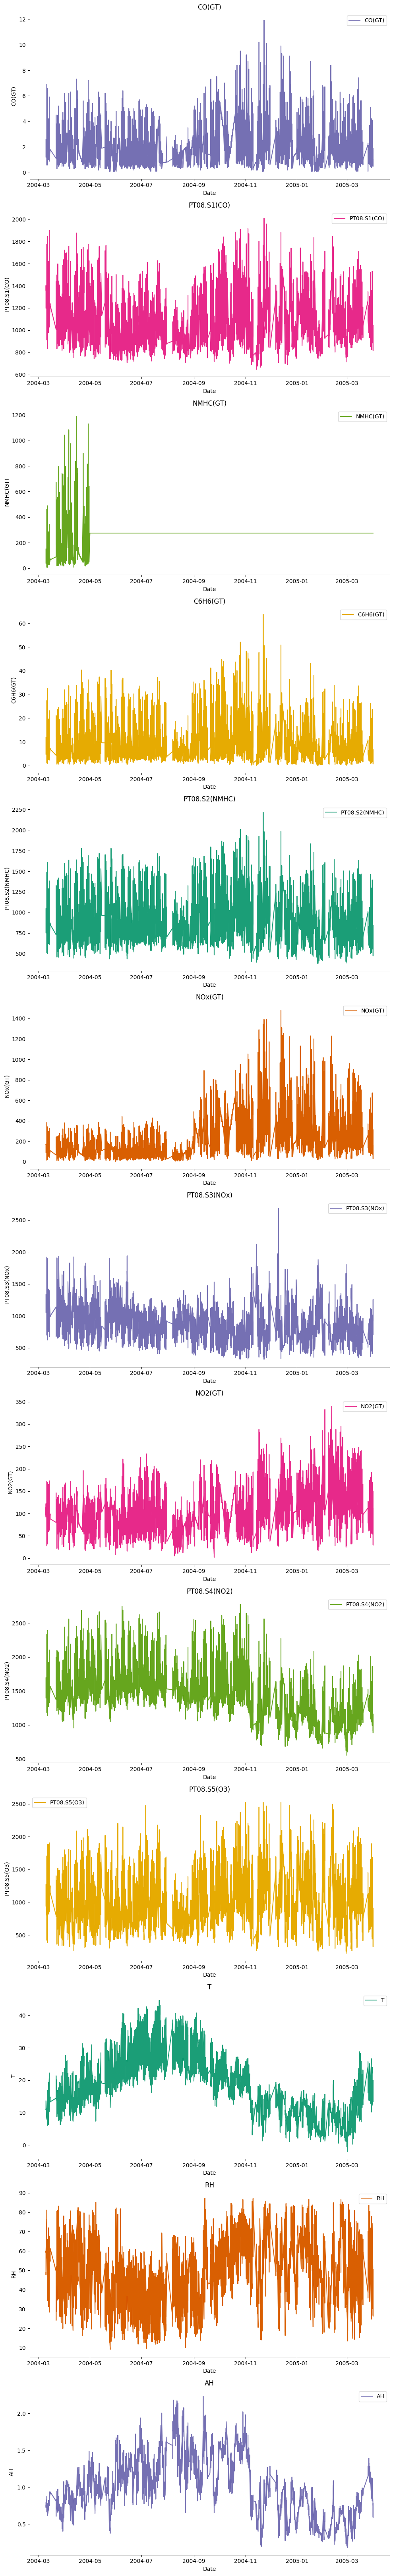

In [4]:
def plot_time_series(linear_interpolate_data, date_col, ignore_cols):
    # make sure the data are sorted by date
    data_sorted = linear_interpolate_data.sort_values(date_col, ascending=True)
    
    # create the canvas
    fig, axes = plt.subplots(nrows=len(linear_interpolate_data.columns) - len(ignore_cols), figsize=(10, 5 * (len(linear_interpolate_data.columns) - len(ignore_cols))), layout='constrained')
    
    # set the solour set
    palette = list(sns.palettes.mpl_palette('Dark2'))

    # traverse all the columns, create a plot for each feature
    for i, col in enumerate(linear_interpolate_data.columns):
        if col not in ignore_cols:
            ax = axes[i - len(ignore_cols)]
            ax.plot(data_sorted[date_col], data_sorted[col], label=col, color=palette[i % len(palette)])
            ax.set_title(col)
            ax.set_xlabel('Date')
            ax.set_ylabel(col)
            ax.legend()

    sns.despine(fig=fig)
    plt.tight_layout()
    plt.show()

plot_time_series(linear_interpolate_data, 'Date', ['Date', 'Time'])

## Outliers Plot

C:\Users\klaus\AppData\Local\Temp\ipykernel_10792\2317115529.py:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


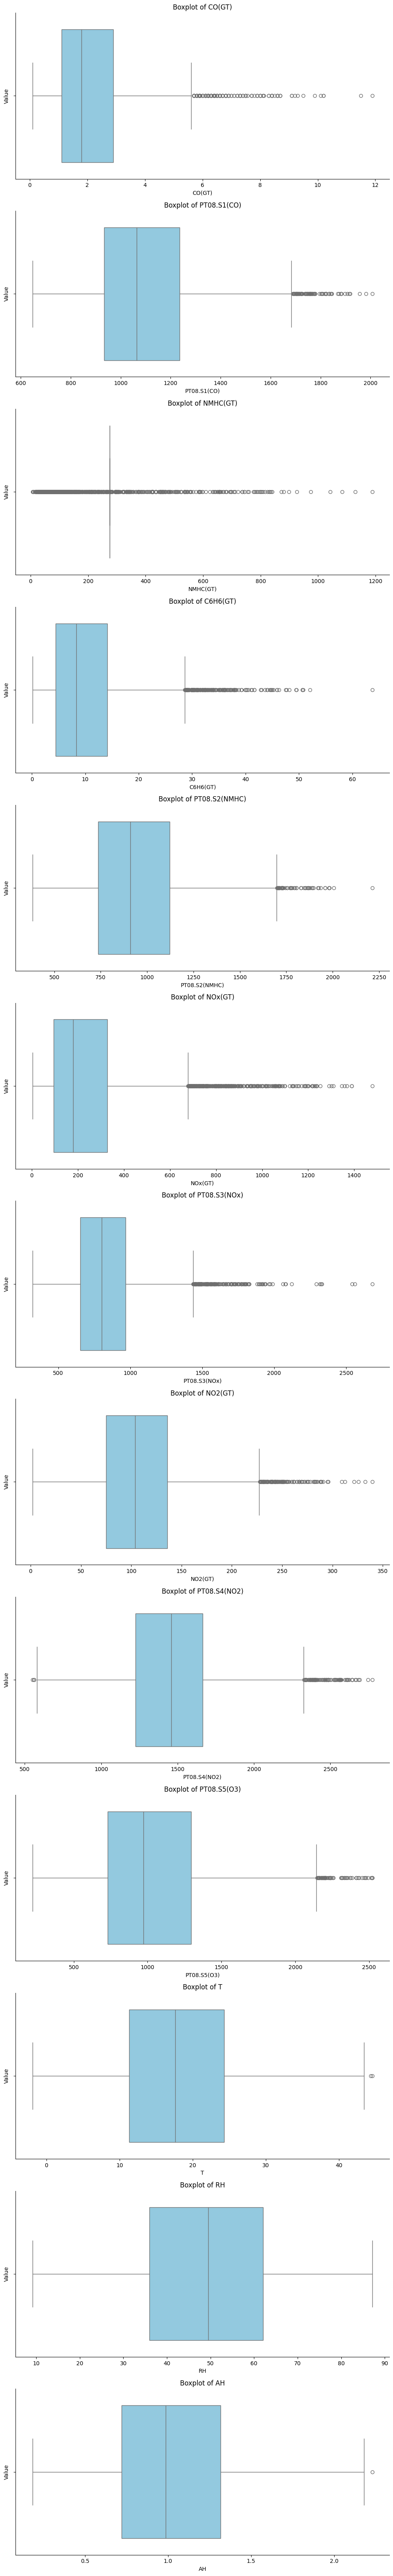

In [5]:
def plot_outliers(linear_interpolate_data, ignore_cols):
    num_cols = linear_interpolate_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    num_cols = [col for col in num_cols if col not in ignore_cols]

    fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 5 * len(num_cols)), layout='constrained')

    for i, col in enumerate(num_cols):
        sns.boxplot(x=linear_interpolate_data[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Value')

    sns.despine(fig=fig)
    plt.tight_layout()
    plt.show()

plot_outliers(linear_interpolate_data, ['DateTime'])

## Data Preprocessing Part2 
### Determine Threshold and Draw Correlation matrix

Calculate the average threshold of CO(GT): This will be used in the classification task to determine whether the CO concentration exceeds this threshold.

Average threshold of CO(GT): The average threshold of carbon monoxide (CO) is calculated to be 2.15, which is used in the classification task to determine whether the CO concentration in the sample exceeds this threshold.

create a Target column called 'CO_Target' as the result of identifying whether CO has exceeds the threshold

Then create a Correlation Matrix and drop the features with low correlation to CO(GT)

In [6]:
# calculate the mean value to get the threshold
co_gt_threshold = linear_interpolate_data['CO(GT)'].mean()
print(f"co threshold: {co_gt_threshold}")

linear_interpolate_data['CO_Target'] = (linear_interpolate_data['CO(GT)'] > co_gt_threshold).astype(int)

# ignore date, time and target column
correlation_matrix = linear_interpolate_data[linear_interpolate_data.columns[2:-1]].corr()

low_correlation_features = correlation_matrix['CO(GT)'][correlation_matrix['CO(GT)'].abs() < 0.6].index.tolist()
print("Features with correlation < 0.6 relative to CO(GT):", low_correlation_features)

correlation_matrix




co threshold: 2.142211055276382
Features with correlation < 0.6 relative to CO(GT): ['NMHC(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH']


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.787534,0.278245,0.805360,0.797849,0.790964,-0.661843,0.676897,0.549288,0.767356,0.028405,0.063523,0.079203
PT08.S1(CO),0.787534,1.000000,0.221420,0.879197,0.891595,0.672575,-0.799663,0.617507,0.654328,0.903068,0.027938,0.126673,0.119411
NMHC(GT),0.278245,0.221420,1.000000,0.240486,0.242336,0.164364,-0.293083,0.201297,0.163365,0.217340,0.088673,-0.059610,0.072472
C6H6(GT),0.805360,0.879197,0.240486,1.000000,0.982090,0.647815,-0.743866,0.562377,0.746261,0.855643,0.194227,-0.066664,0.157155
PT08.S2(NMHC),0.797849,0.891595,0.242336,0.982090,1.000000,0.640296,-0.808200,0.594324,0.759371,0.873225,0.232943,-0.093113,0.174017
NOx(GT),0.790964,0.672575,0.164364,0.647815,0.640296,1.000000,-0.636797,0.768603,0.202537,0.737643,-0.246850,0.204214,-0.127589
PT08.S3(NOx),-0.661843,-0.799663,-0.293083,-0.743866,-0.808200,-0.636797,1.000000,-0.625573,-0.536256,-0.816543,-0.119514,-0.077963,-0.212335
NO2(GT),0.676897,0.617507,0.201297,0.562377,0.594324,0.768603,-0.625573,1.000000,0.120511,0.678717,-0.203570,-0.071551,-0.330349
PT08.S4(NO2),0.549288,0.654328,0.163365,0.746261,0.759371,0.202537,-0.536256,0.120511,1.000000,0.556269,0.573467,-0.030877,0.641915
PT08.S5(O3),0.767356,0.903068,0.217340,0.855643,0.873225,0.737643,-0.816543,0.678717,0.556269,1.000000,-0.046166,0.127112,0.045818


From the correlation matrix above, we can find out that the first row shows the correlation of features with aspect of CO(GT). After reading these data, I found it's better to choose the data with absolute correlation larger than 0.6, so I will prefer to ignore NMHC(GT), PT08.S4(NO2), T, RH, AH in the later data processing for the correlation concern.

After considering about the correlation, outlier and missing values, I decide: For the feature selection part, I will drop 'CO(GT)', 'CO_Target' since they are the labels, then I will drop ['NMHC(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH']

## Data Preprocessing Part3 
### Feature Slection and Normalisation

I did feature selection based on correlation matrix for 2 purposes:

Dimensionality reduction: 
By removing highly correlated redundant features, the dimensionality of the data can be effectively reduced. This not only reduces the computational resources required for model training, but also shortens the training time.

Avoid overfitting: Reducing feature dimenssionality helps mitigate the risk of overfitting.

I do normalisation here to avoid the model overfitting on some features, since the different scale of feature values will easily cause overfitting. If we do not do normalisation, the weight of the high value will be high as well -> which will impact more of the y value (label prediction) because of the bias. So I do normalisation to make the mean of the features will be 0 and the standard deviation will be 1.

In [7]:
delete_column = ["CO(GT)", "Date", "Time", "CO_Target"]

delete_column.extend(low_correlation_features)

delete_column = list(set(delete_column))

x_value = linear_interpolate_data.drop(columns=delete_column)
y_value = linear_interpolate_data['CO_Target']

scaler = StandardScaler()
x_value = scaler.fit_transform(x_value)

# demonstarate the Numpy Array
x_value.shape


(8358, 7)

## Data Preprocessing Part4
### Divide Data to Training/Validation/Testing set

70% Training set, 15% Validation set, 15% testing set

Use the training set to train model, validation set to adjust parameters and the test set to test generalization ability.

In [8]:
# Split the data into training, validation, and test sets
# use random state for reusable
x_train, x_val_test, y_train, y_val_test = train_test_split(x_value, y_value, test_size=0.3, random_state=42)

x_validation, x_test, y_validation, y_test = train_test_split(x_val_test, y_val_test, test_size=1/2, random_state=42)

x_train.shape , x_validation.shape, x_test.shape, y_train.shape , y_validation.shape, y_test.shape

((5850, 7), (1254, 7), (1254, 7), (5850,), (1254,), (1254,))

## Model Implementation

Implement the Neural Network based on Keras

#### Regularization

* Use Dropout to do regularization to make the neural network more robust. Dropout will reduce the complex co-adaptation relationship between neurons by "During the training process, the activation values ​​of some neurons in the network are randomly set to 0".

* This code first defines a neural network with two hidden layers (64 and 32 neurons respectively) and uses the ReLU activation function. The output layer uses the Sigmoid activation function, which is a typical binary classification output layer configuration. The model is compiled using the Adam optimizer and the binary cross entropy loss function.

In [9]:
# # Design the classification neural network
model_classification = Sequential([
    # 32 neurons, x_train.shape[1] -> use the 7 features as the shape
    Dense(32, input_dim=x_train.shape[1], activation='relu'),
    # Dropout for regularization
    Dropout(0.5),
    # 16 neurons
    Dense(16, activation='relu'),
    # Dropout for regularization
    Dropout(0.3),
    # 1 neuron -> output layer
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# # Compile the model
model_classification.compile(optimizer=Adam(learning_rate=0.001),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

model_classification.summary()



c:\Users\klaus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# train the model
history = model_classification.fit(x_train, y_train, 
                         batch_size=32,
                         epochs=100, 
                         validation_data=(x_validation, y_validation))

history_result = pd.DataFrame(history.history)

history_result

Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6336 - loss: 0.6077 - val_accuracy: 0.8740 - val_loss: 0.3209
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8598 - loss: 0.3827 - val_accuracy: 0.8844 - val_loss: 0.2916
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8508 - loss: 0.3750 - val_accuracy: 0.8868 - val_loss: 0.2789
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8663 - loss: 0.3503 - val_accuracy: 0.8876 - val_loss: 0.2699
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8725 - loss: 0.3452 - val_accuracy: 0.8963 - val_loss: 0.2630
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8757 - loss: 0.3305 - val_accuracy: 0.8963 - val_loss: 0.2582
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8699 - loss: 0.3359 - val_accuracy: 0.8987 - val_loss: 0.2546
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8798 - loss: 0.3

,accuracy,loss,val_accuracy,val_loss
0,0.757265,0.518372,0.874003,0.320921
1,0.855556,0.388129,0.884370,0.291585
2,0.860513,0.360157,0.886762,0.278852
3,0.868376,0.347560,0.887560,0.269918
4,0.875385,0.333519,0.896332,0.263045
...,...,...,...,...
95,0.903590,0.263574,0.901116,0.232323
96,0.898462,0.268722,0.904306,0.231809
97,0.899829,0.265408,0.905901,0.231694
98,0.901538,0.263736,0.905104,0.232607


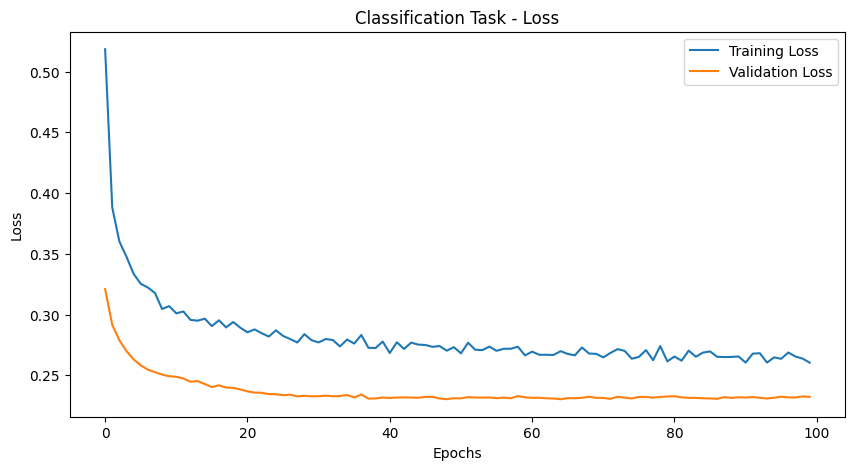

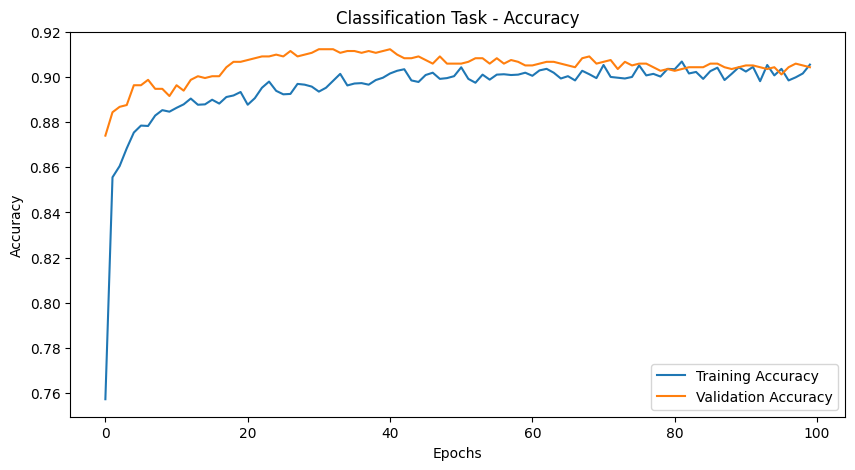

In [11]:
# training and validation loss
plt.figure(figsize=(10, 11))
plt.subplot(2,1,1)
plt.plot(history_result['loss'], label='Training Loss')
plt.plot(history_result['val_loss'], label='Validation Loss')
plt.title('Classification Task - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.figure(figsize=(10, 11))
plt.subplot(2,1,2)
plt.plot(history_result['accuracy'], label='Training Accuracy')
plt.plot(history_result['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Task - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [12]:
y_pred = (model_classification.predict(x_test)>0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("")
print("Confusion Matrix:")
print("                   Positive (Predicted)     Negative (Predicted)")
print(f"Positive (Actual)     {tp:<28}{fp:<28}")
print(f"Negative (Actual)     {fn:<28}{tn:<28}")
print("")
print(f"{'':<30}{'Accuracy':<15}{'Precision':<15}{'Number of Samples'}")
print(f"CO(GT) classification{'':<10}{accuracy:.2%}{'':<10}{precision:.2%}{'':<12}{len(y_test)}")


model_classification.save('model_classification.h5')


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step



Confusion Matrix:
                   Positive (Predicted)     Negative (Predicted)
Positive (Actual)     467                         54                          
Negative (Actual)     64                          669                         

                              Accuracy       Precision      Number of Samples
CO(GT) classification          90.59%          89.64%            1254


# Regression

use correlation matrix to drop the features with correlation lower than 0.6

In [13]:
correlation_matrix = linear_interpolate_data[linear_interpolate_data.columns[2:-1]].corr()

low_correlation_features = correlation_matrix['NOx(GT)'][correlation_matrix['NOx(GT)'].abs() < 0.6].index.tolist()
print("Features with correlation < 0.6 relative to NOx(GT):", low_correlation_features)

correlation_matrix


Features with correlation < 0.6 relative to NOx(GT): ['NMHC(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH']


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.787534,0.278245,0.805360,0.797849,0.790964,-0.661843,0.676897,0.549288,0.767356,0.028405,0.063523,0.079203
PT08.S1(CO),0.787534,1.000000,0.221420,0.879197,0.891595,0.672575,-0.799663,0.617507,0.654328,0.903068,0.027938,0.126673,0.119411
NMHC(GT),0.278245,0.221420,1.000000,0.240486,0.242336,0.164364,-0.293083,0.201297,0.163365,0.217340,0.088673,-0.059610,0.072472
C6H6(GT),0.805360,0.879197,0.240486,1.000000,0.982090,0.647815,-0.743866,0.562377,0.746261,0.855643,0.194227,-0.066664,0.157155
PT08.S2(NMHC),0.797849,0.891595,0.242336,0.982090,1.000000,0.640296,-0.808200,0.594324,0.759371,0.873225,0.232943,-0.093113,0.174017
NOx(GT),0.790964,0.672575,0.164364,0.647815,0.640296,1.000000,-0.636797,0.768603,0.202537,0.737643,-0.246850,0.204214,-0.127589
PT08.S3(NOx),-0.661843,-0.799663,-0.293083,-0.743866,-0.808200,-0.636797,1.000000,-0.625573,-0.536256,-0.816543,-0.119514,-0.077963,-0.212335
NO2(GT),0.676897,0.617507,0.201297,0.562377,0.594324,0.768603,-0.625573,1.000000,0.120511,0.678717,-0.203570,-0.071551,-0.330349
PT08.S4(NO2),0.549288,0.654328,0.163365,0.746261,0.759371,0.202537,-0.536256,0.120511,1.000000,0.556269,0.573467,-0.030877,0.641915
PT08.S5(O3),0.767356,0.903068,0.217340,0.855643,0.873225,0.737643,-0.816543,0.678717,0.556269,1.000000,-0.046166,0.127112,0.045818


drop the features based on corelation then use StandardScaler for Normalisation

In [14]:
delete_column = ["NOx(GT)", "Date", "Time", "CO_Target"]

delete_column.extend(low_correlation_features)

delete_column = list(set(delete_column))

x_value = linear_interpolate_data.drop(columns=delete_column)
y_value = linear_interpolate_data['NOx(GT)']

scaler = StandardScaler()
x_value = scaler.fit_transform(x_value)

# demonstarate the Numpy Array
x_value.shape

(8358, 7)

divide the data set：
70% Training set, 20% Validation set, 10% testing set

In [15]:
# make 70% of the total dataset to be Training set 
training_set_size = int(0.7 * len(data))

# use 20% to do validation
validation_size = int(0.2 * len(data))

# make 10% of the total dataset to be Testing set
test_size = int(0.1 * len(data))

# divide the data set by their original order instead of using random split 
# this will keeps original order of the data set (since this is an Order-sensitive datasets)
x_training = x_value[:training_set_size]
y_training = y_value[:training_set_size]
x_val = x_value[training_set_size:training_set_size+validation_size]
y_val = y_value[training_set_size:training_set_size+validation_size]
x_test = x_value[training_set_size+validation_size:]
y_test = y_value[training_set_size+validation_size:]

x_training.shape, x_val.shape, x_test.shape, y_training.shape, y_val.shape, y_test.shape


((5850, 7), (1671, 7), (837, 7), (5850,), (1671,), (837,))

create the model and makes change the loss function and metrics to be 'mean_squared_error' and 'mean_absolute_error'

In [16]:
model_regression = Sequential([
    # 32 neurons, x_train.shape[1] -> use the 6 features as the shape, use l2 regularization
    Dense(32, input_shape=(x_training.shape[1],), activation='relu'),
    # Dropout for regularization
    Dropout(0.5),
    # 16 neurons
    Dense(16, activation='relu'),
    # Dropout for regularization
    Dropout(0.3),
    # 1 neuron -> output layer
    Dense(1, activation='linear')  # Sigmoid for binary classification
])

# # Compile the model
model_regression.compile(optimizer=Adam(learning_rate=0.001),
                             loss='mean_squared_error',
                             metrics=['mean_absolute_error'])

model_regression.summary()

c:\Users\klaus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# train the model
history = model_regression.fit(x_training, y_training, 
                         batch_size=32,
                         epochs=100, 
                         validation_data=(x_val, y_val))

history_result = pd.DataFrame(history.history)

history_result

Epoch 1/100


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74403.6094 - mean_absolute_error: 203.0337 - val_loss: 171375.7344 - val_mean_absolute_error: 340.6931
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57575.7461 - mean_absolute_error: 173.0981 - val_loss: 95886.6328 - val_mean_absolute_error: 255.6833
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 32557.0703 - mean_absolute_error: 125.2256 - val_loss: 45194.2227 - val_mean_absolute_error: 179.4239
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 23714.6074 - mean_absolute_error: 106.4462 - val_loss: 40773.5078 - val_mean_absolute_error: 167.6316
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 22502.6016 - mean_absolute_error: 103.0259 - val_loss: 31211.6836 - val_mean_absolute_error: 142.8088
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 19523.0957 - mean_absolute_error: 95.0435 - val_loss: 24533.5527 - val_mean_absolute_error: 121.5265
Epoch 7/100
183/183 ━━━━━━

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,73109.484375,200.345200,171375.734375,340.693115
1,54014.496094,165.509491,95886.632812,255.683350
2,28044.767578,116.771034,45194.222656,179.423874
3,24464.472656,107.156784,40773.507812,167.631561
4,21461.865234,100.066772,31211.683594,142.808777
...,...,...,...,...
95,12767.000977,72.484123,12115.665039,73.592117
96,12432.966797,72.742615,12127.726562,73.583771
97,12808.996094,73.256668,12165.614258,73.650978
98,12383.136719,72.465820,11959.746094,73.361084


draw the plot based on the training result

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


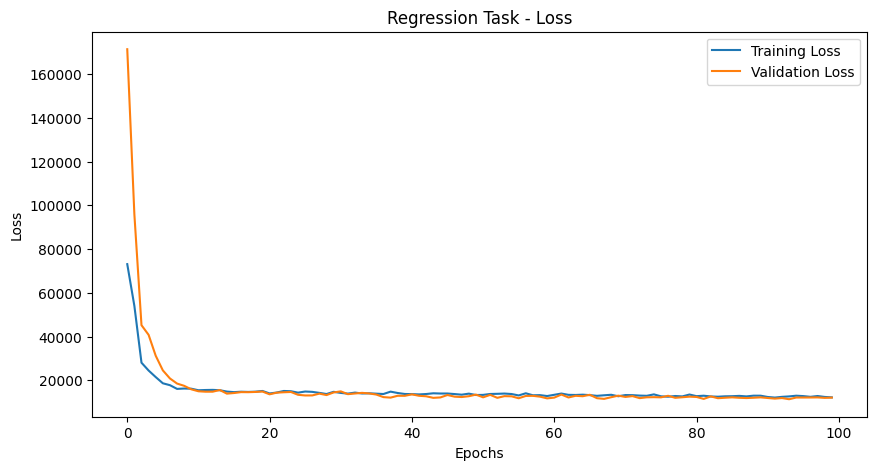

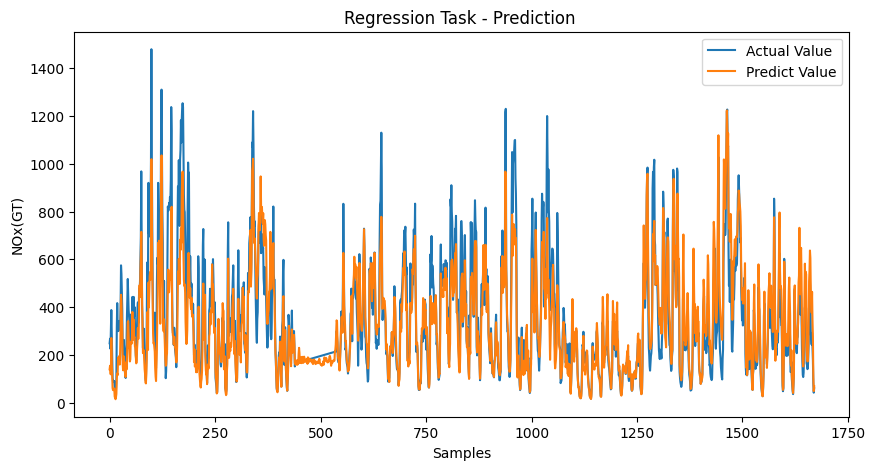

In [18]:
# training and validation loss
plt.figure(figsize=(10, 11))
plt.subplot(2,1,1)
plt.plot(history_result['loss'], label='Training Loss')
plt.plot(history_result['val_loss'], label='Validation Loss')
plt.title('Regression Task - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

y_pred = (model_regression.predict(x_val)).astype(int)

# training and validation accuracy
plt.figure(figsize=(10, 11))
plt.subplot(2,1,2)
plt.plot(y_val.values, label='Actual Value')
plt.plot(y_pred, label='Predict Value')
plt.title('Regression Task - Prediction ')
plt.xlabel('Samples')
plt.ylabel('NOx(GT)')
plt.legend()

plt.show()


In [26]:
model_regression.save('model_regression.h5')

# Calculate performance metrics
y_pred = model_regression.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Number of Samples: {len(y_test)}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
Root Mean Squared Error (RMSE): 74.65054364648731
Mean Absolute Error (MAE): 55.68283270832459
Number of Samples: 837


# Do not Use the script since it is for discussion and file path didn't been set

# **Script**

# Script - Classification_Model

## Script - Load Model and Data Processing

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, mean_absolute_error
import keras as k
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn as sk


# Load the classification model
classification_model = tf.keras.models.load_model('model_classification.h5')

# print model summary
print("Model Summary:")
classification_model.summary()


# read the testing datrQuaa
excel_file_path = "AirQualityUCI _ Students.xlsx"
data = pd.read_excel(excel_file_path)

data.describe()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8358,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000
mean,2004-09-20 04:16:42.727925376,-36.187928,1038.533411,-158.119167,0.894268,889.323901,162.607933,790.043631,53.912228,1382.696877,968.419987,8.713360,38.201273,-7.780588
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-17 00:00:00,0.500000,915.062500,-200.000000,3.968875,709.000000,45.000000,634.250000,49.000000,1177.500000,692.062500,10.450000,33.974999,0.675253
50%,2004-09-21 00:00:00,1.500000,1048.500000,-200.000000,7.826424,892.000000,136.000000,793.000000,95.000000,1442.500000,940.125000,17.225000,48.137500,0.971383
75%,2004-12-27 00:00:00,2.600000,1215.687500,-200.000000,13.636091,1104.750000,282.000000,958.687500,132.000000,1658.187500,1251.750000,24.075000,61.593750,1.307486
max,2005-04-01 00:00:00,11.900000,2007.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,87.174999,2.231036
std,NaN,79.260156,338.349674,141.931963,43.609487,350.473599,260.322621,327.590979,130.150259,479.299713,464.837162,45.516939,53.678637,41.139234


### Script - Classification data preprocessing

In [21]:
# Replace -200 values with NaN for further processing

linear_interpolate_data = data.replace(-200, np.nan)
columns_missing = linear_interpolate_data.columns[2:]
linear_interpolate_data[columns_missing] = linear_interpolate_data[columns_missing].interpolate(method='linear')

# calculate the mean value
co_gt_threshold = linear_interpolate_data['CO(GT)'].mean()
print(f"co threshold: {co_gt_threshold}")

linear_interpolate_data['CO_Target'] = (linear_interpolate_data['CO(GT)'] > co_gt_threshold).astype(int)

# ignore date, time and target column
correlation_matrix = linear_interpolate_data[linear_interpolate_data.columns[2:-1]].corr()

# ignore matrix based on correlation matrix
low_correlation_features = correlation_matrix['CO(GT)'].abs().sort_values().head(5).index.tolist()
print("Features with the lowest 5 correlation values relative to CO(GT):", low_correlation_features)


# feature selection
delete_column = ["CO(GT)", "Date", "Time", "CO_Target"]

delete_column.extend(low_correlation_features)
delete_column = list(set(delete_column))

x_value = linear_interpolate_data.drop(columns=delete_column)
y_value = linear_interpolate_data['CO_Target']

scaler = StandardScaler()
x_value = scaler.fit_transform(x_value)


x_value.shape, y_value.shape

co threshold: 2.142211055276382
Features with the lowest 5 correlation values relative to CO(GT): ['T', 'RH', 'AH', 'NMHC(GT)', 'PT08.S4(NO2)']


((8358, 7), (8358,))

## Script - Classification Predict result

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, mean_absolute_error


# Prediction test set
y_pred = (classification_model.predict(x_value)>0.5).astype(int)

# get the confusion matrix
cm = confusion_matrix(y_value, y_pred)

tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_value, y_pred)
precision = precision_score(y_value, y_pred)


print("")
print("Confusion Matrix:")
print("                   Positive (Predicted)     Negative (Predicted)")
print(f"Positive (Actual)     {tp:<28}{fp:<28}")
print(f"Negative (Actual)     {fn:<28}{tn:<28}")
print("")
print(f"{'':<30}{'Accuracy':<15}{'Precision':<15}{'Number of Samples'}")
print(f"CO(GT) classification{'':<10}{accuracy:.2%}{'':<10}{precision:.2%}{'':<12}{len(y_value)}")

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step

Confusion Matrix:
                   Positive (Predicted)     Negative (Predicted)
Positive (Actual)     2983                        336                         
Negative (Actual)     405                         4634                        

                              Accuracy       Precision      Number of Samples
CO(GT) classification          91.13%          89.88%            8358


# Script - Regression_Model

## Script - Load Model and Data Processing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, mean_absolute_error
import keras as k
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn as sk


# Load the trained model
regression_model = tf.keras.models.load_model('model_regression.h5')

# print model summary
print("Model Summary:")
regression_model.summary()



Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Script - Regression data preprocessing

In [24]:

correlation_matrix = linear_interpolate_data[linear_interpolate_data.columns[2:-1]].corr()
# ignore matrix based on correlation matrix
low_correlation_features = correlation_matrix['NOx(GT)'].abs().sort_values().head(5).index.tolist()
print("Features with the lowest 5 correlation values relative to NOx(GT):", low_correlation_features)

delete_column = ["NOx(GT)", "Date", "Time", "CO_Target"]

delete_column.extend(low_correlation_features)

delete_column = list(set(delete_column))

x_value = linear_interpolate_data.drop(columns=delete_column)
y_value = linear_interpolate_data['NOx(GT)']

scaler = StandardScaler()
x_value = scaler.fit_transform(x_value)

x_value.shape

Features with the lowest 5 correlation values relative to NOx(GT): ['AH', 'NMHC(GT)', 'PT08.S4(NO2)', 'RH', 'T']


(8358, 7)

## Script - Regression Predict result

In [25]:
# Calculate performance metrics
y_pred = regression_model.predict(x_value)

rmse = np.sqrt(mean_squared_error(y_value, y_pred))
mae = mean_absolute_error(y_value, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Number of Samples: {len(y_value)}")

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
Root Mean Squared Error (RMSE): 93.27294923875255
Mean Absolute Error (MAE): 62.030070454636075
Number of Samples: 8358
